import pandas as pd
data = pd.read_csv('csc2548_ml4h/adult_icu.gz', compression='gzip')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from utils import *
from sklearn import preprocessing

In [2]:
data = pd.read_csv('csc2548_ml4h/adult_icu.gz', compression='gzip')

In [3]:
data

,subject_id,hadm_id,icustay_id,age,mort_icu,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,...,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,train
0,3,145834,211552,76.0,0,1,1,1,0,0,...,4.8,282.0,5.4,30.7,1.3,13.5,136.0,53.0,12.7,1
1,6,107064,228232,65.0,0,1,1,1,0,0,...,8.5,315.0,5.4,139.0,1.4,14.6,138.0,62.0,10.6,1
2,9,150750,220597,41.0,1,1,1,1,0,0,...,2.9,258.0,2.8,21.7,1.1,12.7,140.0,16.0,7.5,1
3,12,112213,232669,72.0,0,1,1,1,0,0,...,6.6,156.0,4.9,55.2,1.7,15.9,138.0,28.0,8.4,1
4,13,143045,263738,39.0,0,1,1,1,0,0,...,3.9,216.0,3.5,44.1,1.2,13.7,139.0,13.0,16.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,99982,112748,275958,65.0,0,0,1,1,0,0,...,3.9,140.0,3.4,37.8,2.5,26.5,140.0,36.0,5.4,0
27344,99982,183791,239827,65.0,0,0,1,1,0,0,...,2.3,163.0,3.8,34.3,1.3,13.9,131.0,42.0,7.1,0
27345,99985,176670,279638,53.0,0,1,1,1,0,0,...,2.2,250.0,3.9,47.7,1.1,12.5,136.0,13.0,12.6,0
27346,99991,151118,226241,47.0,0,1,1,1,0,0,...,2.3,188.0,3.4,27.8,1.0,12.1,143.0,26.0,4.2,0


In [4]:
drop_cols = ['train', 'subject_id', 'hadm_id', 'icustay_id', 'mort_icu']
binary_cols = ['first_hosp_stay', 'first_icu_stay', 'adult_icu', 'eth_asian', 'eth_black', 'eth_hispanic', 'eth_other', 'eth_white', 'admType_ELECTIVE', 'admType_EMERGENCY', 'admType_NEWBORN', 'admType_URGENT']

In [5]:
# preprocessing.scale(data)

In [6]:
for col in data.columns:
        if ((col not in binary_cols) and (col not in drop_cols)):
            data[col] = preprocessing.scale(data[col])
# data is a "dataframe"; data[col] is a "series"--similar to np

In [7]:
data

,subject_id,hadm_id,icustay_id,age,mort_icu,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,...,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,train
0,3,145834,211552,0.793887,0,1,1,1,0,0,...,0.723545,0.342360,1.369370,-0.324081,-0.241732,-0.348965,-0.371095,1.041051,-0.006248,1
1,6,107064,228232,0.109824,0,1,1,1,0,0,...,3.335831,0.593822,1.369370,4.449346,-0.158231,-0.217297,0.009146,1.425438,-0.215525,1
2,9,150750,220597,-1.382676,1,1,1,1,0,0,...,-0.617899,0.159479,-1.713925,-0.720764,-0.408733,-0.444723,0.389386,-0.539206,-0.524457,1
3,12,112213,232669,0.545137,0,1,1,1,0,0,...,1.994387,-0.617768,0.776429,0.755780,0.092270,-0.061689,0.009146,-0.026690,-0.434767,1
4,13,143045,263738,-1.507051,0,1,1,1,0,0,...,0.088124,-0.160564,-0.883807,0.266537,-0.325232,-0.325025,0.199266,-0.667335,0.382408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,99982,112748,275958,0.109824,0,0,1,1,0,0,...,0.088124,-0.739689,-1.002395,-0.011141,0.760275,1.207112,0.389386,0.314987,-0.733733,0
27344,99982,183791,239827,0.109824,0,0,1,1,0,0,...,-1.041513,-0.564427,-0.528042,-0.165407,-0.241732,-0.301086,-1.321696,0.571245,-0.564319,0
27345,99985,176670,279638,-0.636426,0,1,1,1,0,0,...,-1.112115,0.098518,-0.409454,0.425211,-0.408733,-0.468663,-0.371095,-0.667335,-0.016214,0
27346,99991,151118,226241,-1.009551,0,1,1,1,0,0,...,-1.041513,-0.373926,-1.002395,-0.451901,-0.492234,-0.516542,0.959747,-0.112109,-0.853320,0


In [8]:
X_train = data[data['train'] == 1]
X_test = data[data['train'] == 0]
y_train = X_train['mort_icu']
y_test = X_test['mort_icu']

X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)

In [9]:
clf = LogisticRegression(penalty = 'l2', max_iter=500, solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_predict = clf.predict(X_test)
y_predict_prob = clf.predict_proba(X_test)

# comment on model performance
print("Score on training set: ", clf.score(X_train,y_train))
print("Score on testing set: ", clf.score(X_test,y_test))
print("Accuracy score:",metrics.accuracy_score(y_test, y_predict))
print("No. of iterations to converge: ", clf.n_iter_)

Score on training set:  0.9055883736734801
Score on testing set:  0.9059496289086264
Accuracy score: 0.9059496289086264
No. of iterations to converge:  [335]


In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label = 1)    #[:,1]: the first column

The threshod is:  [2.00000000e+00 1.00000000e+00 9.26577857e-01 ... 9.11724915e-03
 9.11418883e-03 1.91316073e-03]
AUC score:  0.7722211174195345


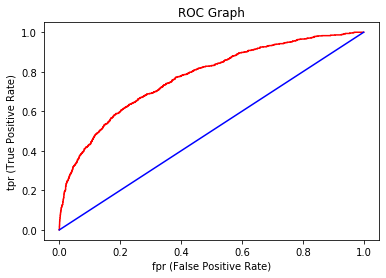

In [12]:
plot_roc(fpr, tpr, "4a_roc_graph.png")
print("The threshod is: ", thresholds)
print("AUC score: ", metrics.roc_auc_score(y_test, y_predict_prob[:,1]))

In [13]:
# confusion matrix to evaluate the model performance
# instrad of being overwhelmed with confusion matricrs, ROC graphs provide a simple way to summarize all of the information
# Also "precision"?

In [14]:
risk_factors(X_train.columns, clf.coef_)

All feature coefficients with signs: 
[[0.22928104334210545, 'age'], [0.10226418064158777, 'first_hosp_stay'], [-0.12855884650039953, 'first_icu_stay'], [-0.00983530671806234, 'adult_icu'], [0.0002404015328206492, 'eth_asian'], [-0.17365511588720353, 'eth_black'], [-0.4280551726999256, 'eth_hispanic'], [0.549568448052315, 'eth_other'], [0.04206613228392566, 'eth_white'], [-0.758243338699275, 'admType_ELECTIVE'], [0.4883912423173155, 'admType_EMERGENCY'], [0.0, 'admType_NEWBORN'], [0.26001678966394287, 'admType_URGENT'], [-0.10231771471147662, 'heartrate_min'], [0.17525419673560255, 'heartrate_max'], [0.13435562136092483, 'heartrate_mean'], [-0.22779092328432035, 'sysbp_min'], [0.09150504601821614, 'sysbp_max'], [-0.21746381983492433, 'sysbp_mean'], [0.09516545731334687, 'diasbp_min'], [-0.12645592983552162, 'diasbp_max'], [-0.25220091466653477, 'diasbp_mean'], [-0.15060529359239735, 'meanbp_min'], [0.009102915344196693, 'meanbp_max'], [0.3828319298999089, 'meanbp_mean'], [-0.0083099710